In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
filename = 'winequality-red.csv'
data = pd.read_csv(filename, sep=';')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### To better understand the data, I imported the CSV file into readable formatting.

In [12]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

### To get an idea of the dataset's structure, I use the info method. This outputs the data types of the values within the set. 

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


### This is a rundown of the summary statistics for the red wine quality dataset.

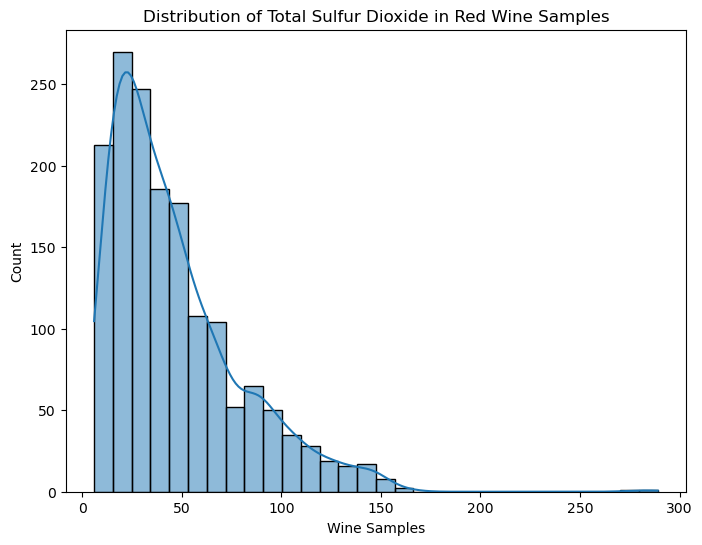

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(data['total sulfur dioxide'], bins=30, kde=True)
plt.title('Distribution of Total Sulfur Dioxide in Red Wine Samples')
plt.xlabel('Wine Samples')
plt.ylabel('Count')
plt.show()

### As we can see, the amount of sulfur dioxide found in red wine is right-skewed. We can calculated above that the average sulfur dioxide in the wine is about 46.468, which we can see in the graph above. Following the empirical rule, about 68% of the data falls within one standard deviation of the mean, which is within the range of ~(14, 58). 

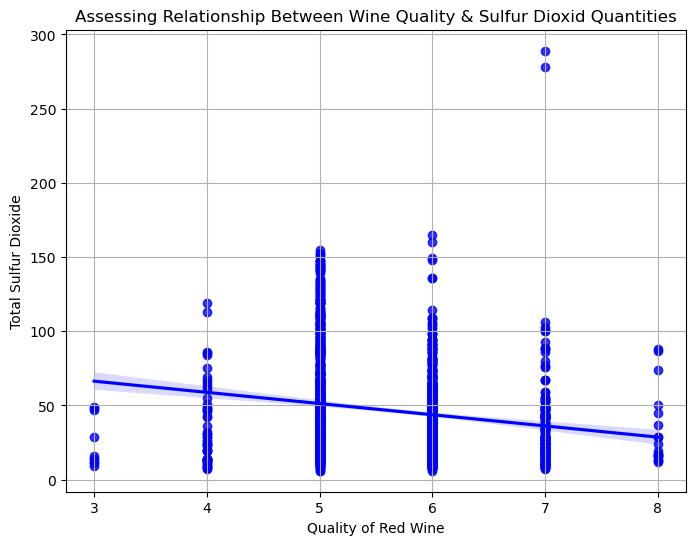

In [15]:
plt.figure(figsize=(8, 6))
sns.regplot(x='quality', y='total sulfur dioxide', data=data, color='blue', marker='o')
plt.title('Assessing Relationship Between Wine Quality & Sulfur Dioxid Quantities')
plt.xlabel('Quality of Red Wine')
plt.ylabel('Total Sulfur Dioxide')
plt.grid(True)

### I was curious about the relationship between sulfur dioxide and red wine quality. As a non-wine drinker, I didn't really know that sulfur dioxide was a variable in producing wine. To explore my queries, I conducted a linear regression. I can see a weak negative correlation with my data, concluding that as our quality of wine increases, the total sulfur dioxide decreases. 

### I have 0 knowledge about wine production. I am curious to learn how the alcohol content can be affected by amount of sulfur dioxide. I will make two hypotheses and test them via hypothesis testing at 5% significance.  

#### Null Hypothesis: sulfur dioxide has no effect on wine's alcohol content.
##### mean of sulfur dioxide quantities of wine = mean of alcohol content of wine

#### Alternate Hypothesis: sulfur dioxide indeed has an effect on wine's alcohol content. 

##### mean of sulfur dioxide quantities of wine =! mean of alcohol content of wine 

In [16]:
from scipy.stats import ttest_ind

group_1 = data['alcohol']
group_2 = data['total sulfur dioxide']

t_statistic, p_value = ttest_ind(group_1, group_2)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('we reject the null hypothesis that sulfur dioxide has no effect on alcohol content')
else:
    print('we fail to reject the null hypothesis that sulfur dioxide has no effect on alcohol content')

T-statistic: -43.79303216927075
P-value: 0.0
we reject the null hypothesis that sulfur dioxide has no effect on alcohol content


#### We yield a statistically significant p-value, which suggests that sulfur dioxide actually does affect wine's alcohol level. 

### I am a law-abiding citizen who can not drink and thus do not have an idea of how alcohol tastes. I wonder if the average citric acid levels are greater than the average sugar levels in alcohol. External sources have suggested that wine veers towards the more sour side. 

#### Null Hypothesis: the levels of residual sugar and citric acid are the same in wine 
#### Alternate Hypothesis: the levels of citric acid are greater than the levels of residual sugar 

##### mean of citric acid > mean of residual sugar 


In [17]:
from scipy.stats import ttest_ind

group_1 = data['citric acid']
group_2 = data['residual sugar']

t_statistic, p_value = ttest_ind(group_1, group_2)
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print('we reject the null hypothesis that the quantities of citric acid are the same as that of residual sugar')
else:
    print('we fail to reject the null hypothesis that the quantities of both compounds are equal')

T-statistic: -63.713526227338306
P-value: 0.0
we reject the null hypothesis that sulfur dioxide has no effect on alcohol content


#### We yield a statistically significant p-value, which suggests that there is more citric acid in wine than residual sugar. When I reach the prime age of 21, I will not enjoy wine as someone with a massive sweet tooth. Sad!